***
# 오전 수업
***
***

### knn_classification.py
- 어제 수업 이어서

In [39]:
# knn_classification.py
# seaborn 라이브러리에서 제공되는 titanic 데이터셋의 탑승객의 생존여부를 KNN 알고리즘으로 분류

import pandas as pd
import seaborn as sns

# seaborn 모듈의 titanic 데이터 로드
titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [40]:
# 한줄에 15개의 컬럼 출력되도록 설정
pd.set_option('display.max_columns', 15)
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [41]:
titanic.info()
#  3   age          714 non-null    float64 << 개수 차이 유의
#  7   embarked     889 non-null    object  << 중복값 유의
#  11  deck         203 non-null    category << null 값 많은 열 제거(유효 데이터 적어서 제거)
#  12  embark_town  889 non-null    object  << embarked 중복값 제거
# dtypes: bool(2), category(2), float64(2), int64(4), object(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


  3   age          714 non-null    float64 << 개수 차이 유의
  
  7   embarked     889 non-null    object  << 중복값 유의
  
  11  deck         203 non-null    category << null 값 많은 열 제거(유효 데이터 적어서 제거)
  
  12  embark_town  889 non-null    object  << embarked 중복값 제거
  
 dtypes: bool(2), category(2), float64(2), int64(4), object(5)

In [42]:
# deck(배의 갑판), embark_town(승선 도시) 컬럼 삭제
rdf = titanic.drop(['deck', 'embark_town'], axis=1)
# 삭제 확인
print(rdf.columns.values)
# ['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class' 'who' 'adult_male' 'alive' 'alone']

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'alive' 'alone']


In [43]:
# age 열에 누락 데이터 행 삭제 (891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)
# 삭제 확인
print(len(rdf)) #891 - 177 = 714

714


In [44]:
## embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환
# embarked 열의 알파벳은 타이타닉호에 탑승한 승객의 도시
#print(rdf.describe(include='all')); print()

# 최빈값 알아보기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
print(most_freq) # S : Southampton

S


In [45]:
# embarked 열에 누락 데이터(NaN)를 S로 치환 - fillna() 사용
rdf['embarked'].fillna(most_freq, inplace=True)

# 분석에 사용할 열(속성) 선택
# titanic.info()
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
# 결과 확인
ndf.info(); print()
print(ndf.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
survived    714 non-null int64
pclass      714 non-null int64
sex         714 non-null object
age         714 non-null float64
sibsp       714 non-null int64
parch       714 non-null int64
embarked    714 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 44.6+ KB

   survived  pclass     sex   age  sibsp  parch embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S


In [46]:
# KNN모델을 적용하기 위해 sex열과 embarked열의 범주형 데이터를 숫자형으로 변환
# 원핫인코딩 - 범주형 데이터를 모델이 인식할 수 있도록 숫자형으로 변환하는것
# 2   sex       714 non-null    object
# 6   embarked  714 non-null    object
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

# embarked열에 생성되는 더미 변수가  town_C, town_Q, town_S로 생성되도록 prefix='town' 옵션 추가
onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

# 열 생성 확인
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
survived    714 non-null int64
pclass      714 non-null int64
sex         714 non-null object
age         714 non-null float64
sibsp       714 non-null int64
parch       714 non-null int64
embarked    714 non-null object
female      714 non-null uint8
male        714 non-null uint8
town_C      714 non-null uint8
town_Q      714 non-null uint8
town_S      714 non-null uint8
dtypes: float64(1), int64(4), object(2), uint8(5)
memory usage: 48.1+ KB


In [47]:
# 기존 sex열과 embarked열 삭제
ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
# 열 삭제 확인
print(ndf.head()); print()
ndf.info()

   survived  pclass   age  sibsp  parch  female  male  town_C  town_Q  town_S
0         0       3  22.0      1      0       0     1       0       0       1
1         1       1  38.0      1      0       1     0       1       0       0
2         1       3  26.0      0      0       1     0       0       0       1
3         1       1  35.0      1      0       1     0       0       0       1
4         0       3  35.0      0      0       0     1       0       0       1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
survived    714 non-null int64
pclass      714 non-null int64
age         714 non-null float64
sibsp       714 non-null int64
parch       714 non-null int64
female      714 non-null uint8
male        714 non-null uint8
town_C      714 non-null uint8
town_Q      714 non-null uint8
town_S      714 non-null uint8
dtypes: float64(1), int64(4), uint8(5)
memory usage: 37.0 KB


In [48]:
# 변수 정의
# 독립변수 x
x = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'town_C', 'town_Q', 'town_S']]
# 종속변수 y
y = ndf['survived']

# 독립 변수 데이터를 정규화(normalization)
# 데이터의 상대적 크기 차이를 없애기 위하여 정규화
from sklearn import preprocessing

x = preprocessing.StandardScaler().fit(x).transform(x)

# train data 와 test data로 분할(7:3 비율)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    # 독립변수, 종속변수
    x, y
    # test data 비율 설정
    , test_size=0.3
    # 난수 seed 설정
    , random_state=10
)

print('train data(x_train) 개수: ', x_train.shape)
print('test data(x_test) 개수: ', x_test.shape)

train data(x_train) 개수:  (499, 9)
test data(x_test) 개수:  (215, 9)


In [49]:
# sklearn 라이브러리에서 KNN 분류 모델 가져오기
from sklearn.neighbors import KNeighborsClassifier

# KNN 모델 객체 생성 (k=5로 설정)
knn = KNeighborsClassifier(n_neighbors=5)

# train data를 가지고 모델 학습
knn.fit(x_train, y_train)

# test data를 가지고 y_hat을 예측 (분류)
# 예측값 구하기
y_hat = knn.predict(x_test)

# 첫 10개의 예측값(y_hat)과 실제값(y_test) 비교 : 10개 모두 일치함 (0:사망자, 1:생존자)
print('예측값(y_hat): ', y_hat[0:10])
print('실제값(y_test): ', y_test.values[0:10])

예측값(y_hat):  [0 0 1 0 0 1 1 1 0 0]
실제값(y_test):  [0 0 1 0 0 1 1 1 0 0]


In [50]:
# KNN 모델 성능 평가
from sklearn import metrics

# 혼돈 행렬
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print('혼돈 행렬: \n', knn_matrix)

혼돈 행렬: 
 [[109  16]
 [ 25  65]]


In [51]:
# 모델 성능평가 지표 출력 (KNN 모델 성능 평가, 평가지표 계산)
knn_report = metrics.classification_report(y_test, y_hat)
print('평가지표 계산(knn): \n',knn_report)

평가지표 계산(knn): 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       125
           1       0.80      0.72      0.76        90

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



***

## 서포트 벡터 머신 (Support Vector Machine)
 1. 분류 및 회귀 모두 사용 가능핚 지도 학습 알고리즘
 2. 분할선부터 근접 샘플 데이터까지 마진을 최대화하는 직선을 가장 좋은 분할선으로 여김
 3. 서포트 벡터 머신은 학습 데이터의 노이즈에 강하고 분류 성능이 매우 좋다는 특징
 4. 다른 알고리즘에 비교하면 학습 데이터 개수도 많이 필요하지 않음

### svm_classification.py

In [23]:
# svm_classification.py

# 기본 라이브러리 호출
import pandas as pd
import seaborn as sns

# load_dataset 함수로 titanic 데이터를 읽어와서 데이터프레임으로 변환
df = sns.load_dataset('titanic')

# 데이터 살펴보기
print(df.head()); print()
df.info()

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age       

In [24]:
# IPython 디스플레이 설정 - 출력할 열의 개수를 15개로 늘리기
pd.set_option('display.max_columns', 15)
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [26]:
# 데이터 자료형 확인 : 데이터를 확인하고 NaN이 많은 열 삭제
df.info()
#  11  deck         203 non-null    category
# NaN값이 많은 deck(배의 갑판)열을 삭제
# embarked(승선)와 내용이 겹치는 embark_town(승선 도시) 열을 삭제

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


- 11  deck         203 non-null    category
  
- NaN값이 많은 deck(배의 갑판)열을 삭제
 
- embarked(승선)와 내용이 겹치는 embark_town(승선 도시) 열을 삭제

In [27]:
#  11  deck         203 non-null    category
# NaN값이 많은 deck(배의 갑판)열을 삭제
# embarked(승선)와 내용이 겹치는 embark_town(승선 도시) 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)
print(rdf.columns.values)
# ['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class' 'who' 'adult_male' 'alive' 'alone']

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'alive' 'alone']


In [28]:
# 승객의 나이를 나타내는 age 열에 누락 데이터가 177개, 누락 데이터가 있는 행을 모두 삭제
# 나이 데이터가 있는 714명의 승객만을 분석
rdf = rdf.dropna(subset=['age'], how='any', axis=0)
print(len(rdf))
# 714

714


In [29]:
# embarked 열의 데이터는 승객들이 타이타닉호에 탑승한 도시명의 첫 글자
# embarked 열의 NaN값을 승선도시 중에서 가장 많은 값으로 치환하기 (S)
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
print(most_freq)
# S

S


In [30]:
# embarked 열에 fillna() 함수를 사용하여 누락 데이터(NaN)를 S로 치환
rdf['embarked'].fillna(most_freq, inplace=True)

# 분석에 사용할 열(속성)을 선택
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
survived    714 non-null int64
pclass      714 non-null int64
sex         714 non-null object
age         714 non-null float64
sibsp       714 non-null int64
parch       714 non-null int64
embarked    714 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 44.6+ KB


In [31]:
# KNN모델을 적용하기 위해 sex열과 embarked열의 범주형 데이터를 숫자형으로 변환
# 원핫인코딩 - 범주형 데이터를 모델이 인식할 수 있도록 숫자형으로 변환
# sex 열은 male과 female을 열 이름으로 갖는 2개의 더미 변수 열이 생성
# concat()함수를 이용하여 더미 변수를 기존 데이터프레임에 연결
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

# embarked 3개의 더미 변수(town_X) 열 생성
# prefix='town' 옵션을 사용 (town_C, town_Q, town_S)
onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

# 기존 sex열과 embarked열 삭제
ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
# 수정 내용 확인
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
survived    714 non-null int64
pclass      714 non-null int64
age         714 non-null float64
sibsp       714 non-null int64
parch       714 non-null int64
female      714 non-null uint8
male        714 non-null uint8
town_C      714 non-null uint8
town_Q      714 non-null uint8
town_S      714 non-null uint8
dtypes: float64(1), int64(4), uint8(5)
memory usage: 37.0 KB


In [32]:
# 독립 변수 x 새로 정의
x = ndf[['pclass', 'age', 'sibsp', 'parch'
    , 'female', 'male'
    , 'town_C', 'town_Q', 'town_S']]
# 종속 변수 y
y = ndf['survived']

# 독립 변수 데이터를 정규화(normalization)
# 데이터의 상대적 크기 차이를 없애기 위하여 정규화

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

# train data 와 test data 분할(7:3 비율)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y
                                                    , test_size=0.3
                                                    , random_state=10)

print('train data 개수: ', x_train.shape)
print('test data 개수: ', x_test.shape)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


In [36]:
# sklearn 라이브러리에서 SVM 분류 모델 가져오기
from sklearn import svm

# SVC 모델 객체 생성 (kernel='rbf' 적용)
svm_model = svm.SVC(kernel='rbf')

# train data를 이용하여 모델 학습
svm_model.fit(x_train, y_train)

# test data를 이용해서 y_hat을 예측 (분류)
# 예측값 구하기
y_hat = svm_model.predict(x_test)

# 첫 10개의 예측값(y_hat)과 실제값(y_test) 비교
# 8개 일치함( 0:사망자, 1:생존자)
print('예측값(y_hat[0:10]):\n', y_hat[0:10])
print('실제값(y_test.values[0:10]):\n', y_test.values[0:10])

예측값(y_hat[0:10]):
 [0 0 1 0 0 0 1 0 0 0]
실제값(y_test.values[0:10]):
 [0 0 1 0 0 1 1 1 0 0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [34]:
# SVM모델 성능 평가 - Confusion Matrix(혼동 행렬) 계산
from sklearn import metrics
svm_matrix = metrics.confusion_matrix(y_test, y_hat)
print('혼동 행렬:\n', svm_matrix)

혼동 행렬:
 [[120   5]
 [ 35  55]]


    P  N

 P [[120   5]

 N [ 35  55]]
- TP(True Positive) : 215명의 승객 중에서 사망자를 정확히 분류한 것이 120명
- FP(False Positive) : 생존자를 사망자로 잘못 분류한 것이 35명
- FN(False Negative) : 사망자를 생존자로 잘못 분류한 것이 5명
- TN(True Negative) : 생존자를 정확하게 분류한 것이 55명

In [35]:
# SVM모델 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y_test, y_hat)
print('svm 모델 성능평가(svm_report):\n', svm_report)

svm 모델 성능평가(svm_report):
               precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



- f1지표(f1-score)는 모델의 예측력을 종합적으로 평가하는 지표
- f1-score 지표를 보면 사망자(0) 예측의 정확도가 0.86이고, 
- 생존자(1) 예측의 정확도는 0.73으로 예측 능력에 차이가 존재
- 전반적으로 KNN모델의 예측 능력과 큰 차이가 없음

평가지표 계산(knn): 

               precision    recall  f1-score   support

           0       0.81      0.87      0.84       125
           1       0.80      0.72      0.76        90

    accuracy                           0.81       215
    macro avg       0.81      0.80      0.80       215
   
    weighted avg       0.81      0.81      0.81       215

***
## 결정 트리(Decision Tree) 알고리즘
 1. 데이터를 여러 등급으로 분류하는 지도 학습 중의 하나이며 트리 구조를 이용한 분류 알고리즘
 2. 학습 데이터에서 트리 모델을 생성
> 무엇을 기준으로 분기할지에 따라 결정 트리는 몇 가지 방법으로 분류 가능
 3. 결정 트리의 장점은 분류 규칙을 트리 모델로 가시화 가능한 것과 분류 결과의 해석이 비교적 용이하다는 것
 4. 생성한 분류 규칙 편집 가능, 학습을 위한 계산 비용도 저렴한 편
 5. 결정 트리는 과적합 하는 경향이 있고 취급하는 데이터의 특성에 따라 트리 모델을 생성하기 어려움
 6. 결정 트리의 과적합 경향으로 인해 결정 트리 단독 사용 대신 앙상블 학습을 조합하여 사용하는 경우가 많음

### tree_classification.py
> UCI(University of California, Irvine) 머신러닝 저장소에서 제공하는 암세포 진단(breast cancer) 데이터셋을 이용하여 악성종양 여부를 Decision Tree 알고리즘 으로 분류

In [54]:
# tree_classification.py

import pandas as pd
import numpy as np

# UCI 저장소에서 암세포 진단(Breast Cancer) 데이터셋 가져오기
uci_path = 'https://archive.ics.uci.edu/ml/' \
           'machine-learning-databases/' \
           'breast-cancer-wisconsin/' \
           'breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)
print(df)
# [699 rows x 11 columns]

          0   1   2   3   4   5   6   7   8   9   10
0    1000025   5   1   1   1   2   1   3   1   1   2
1    1002945   5   4   4   5   7  10   3   2   1   2
2    1015425   3   1   1   1   2   2   3   1   1   2
3    1016277   6   8   8   1   3   4   3   7   1   2
4    1017023   4   1   1   3   2   1   3   1   1   2
..       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
694   776715   3   1   1   1   3   2   1   1   1   2
695   841769   2   1   1   1   2   1   1   1   1   2
696   888820   5  10  10   3   7   3   8  10   2   4
697   897471   4   8   6   4   3   4  10   6   1   4
698   897471   4   8   8   5   4   5  10   4   1   4

[699 rows x 11 columns]


In [55]:
# 11개의 열 이름 지정
df.columns = ['id','clump','cell_size','cell_shape', 'adhesion','epithlial'
    , 'bare_nuclei','chromatin','normal_nucleoli', 'mitoses', 'class']

# IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)
print(df)

          id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0    1000025      5          1           1         1          2           1   
1    1002945      5          4           4         5          7          10   
2    1015425      3          1           1         1          2           2   
3    1016277      6          8           8         1          3           4   
4    1017023      4          1           1         3          2           1   
..       ...    ...        ...         ...       ...        ...         ...   
694   776715      3          1           1         1          3           2   
695   841769      2          1           1         1          2           1   
696   888820      5         10          10         3          7           3   
697   897471      4          8           6         4          3           4   
698   897471      4          8           8         5          4           5   

     chromatin  normal_nucleoli  mitoses  class  
0

In [56]:
# 데이터 자료형 확인
df.info()

# 6   bare_nuclei      699 non-null    object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                 699 non-null int64
clump              699 non-null int64
cell_size          699 non-null int64
cell_shape         699 non-null int64
adhesion           699 non-null int64
epithlial          699 non-null int64
bare_nuclei        699 non-null object
chromatin          699 non-null int64
normal_nucleoli    699 non-null int64
mitoses            699 non-null int64
class              699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [59]:
# 데이터 통계 요약정보 확인 : bare_nuclei 열은 출력 안 됨 (10개의 열만 출력)
print(df.describe()); print()

# bare_nuclei 열의 고유값 확인(unique())
# bare_nuclei 열은 ? 데이터가 포함되어 있음
print(df['bare_nuclei'].unique())
# ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']

                 id       clump   cell_size  cell_shape    adhesion  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

        epithlial   chromatin  normal_nucleoli     mitoses       class  
count  699.000000  699.000000       699.000000  699.000000  699.000000  
mean     3.216023    3.437768         2.866953    1.589413    2.689557  
std      2.214300    2.438364         3.053634    1.715078    0.951273  
min      1.000000    1.000000         1.000000    1.000000    2.0000

In [60]:
# bare_nuclei 열의 '?' 를 누락데이터(np.NaN)으로 변경
df['bare_nuclei'].replace('?', np.NaN, inplace=True)

# 누락데이터 행 삭제
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)

# bare_nuclei 열의 자료형 변경 (문자열 -> 숫자)
df['bare_nuclei'] = df['bare_nuclei'].astype('int')

# 데이터 통계 요약정보 확인
print(df.describe()); print()

# 수정된 자료형 확인
df.info()
# 6   bare_nuclei      683 non-null    int32

                 id       clump   cell_size  cell_shape    adhesion  \
count  6.830000e+02  683.000000  683.000000  683.000000  683.000000   
mean   1.076720e+06    4.442167    3.150805    3.215227    2.830161   
std    6.206440e+05    2.820761    3.065145    2.988581    2.864562   
min    6.337500e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.776170e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171795e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238705e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

        epithlial  bare_nuclei   chromatin  normal_nucleoli     mitoses  \
count  683.000000   683.000000  683.000000       683.000000  683.000000   
mean     3.234261     3.544656    3.445095         2.869693    1.603221   
std      2.223085     3.643857    2.449697         3.052666    1.732674   
min      1.000000     1.000000    1.000000         1.000000 

In [61]:
# 분석에 사용할 속성(변수) 선택
# 독립변수 x (설명변수)
x = df[['clump','cell_size','cell_shape', 'adhesion','epithlial'
    , 'bare_nuclei','chromatin','normal_nucleoli', 'mitoses']]

# 종속변수 y (예측변수)
y = df['class']
# class (2: benign(양성), 4: malignant(악성))
print('y: \n', y)

y: 
 0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: class, Length: 683, dtype: int64


In [62]:
# 설명 변수 데이터를 정규화
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y
                                                    , test_size=0.3
                                                    , random_state=10)

print('train data 개수: ', x_train.shape)
print('test data 개수: ', x_test.shape)

train data 개수:  (478, 9)
test data 개수:  (205, 9)


In [64]:
# sklearn 라이브러리에서 Decision Tree 분류 모델 가져오기
from sklearn import tree

# 결정 트리 모델 생성
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
# Decision Tree 모델 객체 생성 (criterion='entropy' 적용)
# 각 분기점에서 최적의 속성을 찾기 위해 분류 정도를 평가하는 기준으로 entropy 값을 사용
# 트리 레벨로 5로 지정(5단계 까지 가지를 확장 가능 의미)
# 레벨이 많아질수록 모델 학습에 사용하는 훈련 데이터에 대한 예측은 정확해짐

# train data를 가지고 모델 학습
tree_model.fit(x_train, y_train)

# test data를 가지고 y_hat을 예측 (분류)
y_hat = tree_model.predict(x_test)
print('y_hat:\n', y_hat); print()
print('y_test.values:\n', y_test.values)
# 2: benign(양성), 4: malignant(악성)

y_hat:
 [4 4 4 4 4 4 2 2 4 4 4 2 2 4 4 2 2 4 2 4 2 2 2 2 4 2 2 2 2 2 2 4 4 4 2 4 4
 4 2 2 4 2 4 2 4 2 4 2 2 2 2 2 2 2 2 2 4 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2
 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 4 4 2 2 2 2 4 2 4
 2 2 4 2 2 4 2 2 4 2 4 2 4 4 4 4 2 4 2 2 2 2 2 4 4 4 4 2 4 4 2 2 2 4 4 2 4
 2 2 2 4 2 2 2 4 4 2 2 2 2 2 4 2 4 4 2 4 4 2 2 4 4 2 2 4 2 2 2 2 4 2 2 2 4
 2 2 2 2 2 4 2 2 4 2 4 2 4 2 4 4 4 2 4 2]

y_test.values:
 [4 4 4 4 4 4 2 2 4 4 4 2 2 4 4 2 2 4 2 4 2 2 2 2 4 2 2 2 2 2 2 4 4 4 2 4 4
 4 2 2 4 2 4 2 4 2 2 2 2 2 2 2 2 2 2 2 4 4 2 4 2 4 2 4 2 2 2 2 2 2 2 2 4 2
 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 4 4 2 2 2 2 4 2 4
 2 2 4 2 4 4 2 2 2 2 2 2 4 4 4 4 2 4 2 2 2 2 2 4 4 4 4 2 4 4 2 2 2 4 4 2 4
 2 2 2 4 2 2 2 4 4 2 2 2 2 2 4 2 4 4 2 4 4 2 2 4 4 2 2 4 2 2 2 2 4 2 2 2 4
 2 2 2 2 2 4 2 2 2 2 4 2 4 2 4 4 4 2 4 2]


In [66]:
# 첫 10개의 예측값(y_hat)과 실제값(y_test) 비교 : 10개 모두 일치함
print('y_hat:\n', y_hat[0:10]); print()
print('y_test.values:\n', y_test.values[0:10])

y_hat:
 [4 4 4 4 4 4 2 2 4 4]

y_test.values:
 [4 4 4 4 4 4 2 2 4 4]


In [67]:
if y_hat.all() == y_test.all():
    print('y_hat and y_test are the same')
#y_hat and y_test are the same

y_hat and y_test are the same


In [68]:
# Decision Tree 모델 성능 평가 - Confusion Matrix(혼동 행렬) 계산
from sklearn import metrics
tree_matrix = metrics.confusion_matrix(y_test, y_hat)
print('혼동행렬: \n', tree_matrix)

혼동행렬: 
 [[127   4]
 [  2  72]]


혼동행렬: 

          양성   악성
     
    양성  [[127   4]
 
    악성  [  2  72]]

- 양성 종양의 목표값은 2, 악성 종양은 4
- TP(True Positive) : 양성 종양을 정확하게 분류한 것이 127개
- FP(False Positive) : 악성 종양을 양성 종양으로 잘못 분류한 것이 2개
- FN(False Negative) : 양성 종양을 악성 종양으로 잘못 분류한 것이 4개
- TN(True Negative) : 악성 종양을 정확하게 분류한 것이 72개

In [70]:
# Decision Tree 모델 성능 평가 - 평가지표 계산
tree_report = metrics.classification_report(y_test, y_hat)
print('tree_report(평가지표 계산):\n', tree_report)

tree_report(평가지표 계산):
               precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



- f1지표(f1-score)는 모델의 예측력을 종합적으로 평가하는 지표
- f1-score 지표를 보면 양성종양(2) 예측의 정확도가 0.98
- 악성종양(4) 예측의 정확도는 0.96으로 예측 능력에 큰 차이가 없음
- 평균적으로는 0.97의 정확도를 가짐

#### 같은 내용 svm으로 분석 (nottree_svm_classification.py)

svm_report(평가지표 계산):

                    precision    recall  f1-score   support

               2       0.99      0.97      0.98       131
               4       0.95      0.99      0.97        74

        accuracy                           0.98       205
    
       macro avg       0.97      0.98      0.97       205
    weighted avg       0.98      0.98      0.98       205


혼동행렬: 

          양성   악성
     
    양성  [[127   4]
 
    악성  [  1  73]]

In [71]:
# nottree_svm_classification

# tree_classification.py

import pandas as pd
import numpy as np

# UCI 저장소에서 암세포 진단(Breast Cancer) 데이터셋 가져오기
uci_path = 'https://archive.ics.uci.edu/ml/' \
           'machine-learning-databases/' \
           'breast-cancer-wisconsin/' \
           'breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)
print(df)
# [699 rows x 11 columns]
print()

# 11개의 열 이름 지정
df.columns = ['id','clump','cell_size','cell_shape', 'adhesion','epithlial'
    , 'bare_nuclei','chromatin','normal_nucleoli', 'mitoses', 'class']

# IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)
print(df); print()

# 데이터 자료형 확인
df.info()
# 6   bare_nuclei      699 non-null    object
print()

# 데이터 통계 요약정보 확인 : bare_nuclei 열은 출력 안 됨 (10개의 열만 출력)
#print(df.describe())

# bare_nuclei 열의 고유값 확인(unique())
# bare_nuclei 열은 ? 데이터가 포함되어 있음
print(df['bare_nuclei'].unique())
# ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
print()

# bare_nuclei 열의 '?' 를 누락데이터(np.NaN)으로 변경
df['bare_nuclei'].replace('?', np.NaN, inplace=True)

# 누락데이터 행 삭제
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)

# bare_nuclei 열의 자료형 변경 (문자열 -> 숫자)
df['bare_nuclei'] = df['bare_nuclei'].astype('int')

# 데이터 통계 요약정보 확인
#print(df.describe())

# 수정된 자료형 확인
df.info()
# 6   bare_nuclei      683 non-null    int32
print()

# 분석에 사용할 속성(변수) 선택
# 독립변수 x (설명변수)
x = df[['clump','cell_size','cell_shape', 'adhesion','epithlial'
    , 'bare_nuclei','chromatin','normal_nucleoli', 'mitoses']]

# 종속변수 y (예측변수)
y = df['class']
# class (2: benign(양성), 4: malignant(악성))
print('y: \n', y)
print()

# 설명 변수 데이터를 정규화
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y
                                                    , test_size=0.3
                                                    , random_state=10)

print('train data 개수: ', x_train.shape)
print('test data 개수: ', x_test.shape)

print()

# sklearn 라이브러리에서 모델 가져오기
from sklearn import tree
from sklearn import svm


# 결정 트리 모델 생성
#tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
# Decision Tree 모델 객체 생성 (criterion='entropy' 적용)
# 각 분기점에서 최적의 속성을 찾기 위해 분류 정도를 평가하는 기준으로 entropy 값을 사용
# 트리 레벨로 5로 지정(5단계 까지 가지를 확장 가능 의미)
# 레벨이 많아질수록 모델 학습에 사용하는 훈련 데이터에 대한 예측은 정확해짐

# SVC 모델 객체 생성 (kernel='rbf' 적용)
svm_model = svm.SVC(kernel='rbf')

# train data를 가지고 모델 학습
svm_model.fit(x_train, y_train)

# test data를 가지고 y_hat을 예측 (분류)
y_hat = svm_model.predict(x_test)
print('y_hat:\n', y_hat)
print('y_test.values:\n', y_test.values)
# 2: benign(양성), 4: malignant(악성)
print()

# 첫 10개의 예측값(y_hat)과 실제값(y_test) 비교 : 10개 모두 일치함
print('y_hat:\n', y_hat[0:10])
print('y_test.values:\n', y_test.values[0:10])

print()


if y_hat.all() == y_test.all():
    print('y_hat and y_test are the same')
else:
    print('y_hat and y_test are not the same')
#y_hat and y_test are the same


# 모델 성능 평가 - Confusion Matrix(혼동 행렬) 계산
from sklearn import metrics
svm_matrix = metrics.confusion_matrix(y_test, y_hat)
print('혼동행렬: \n', svm_matrix)

# 양성 종양의 목표값은 2, 악성 종양은 4
# TP(True Positive) : 양성 종양을 정확하게 분류한 것이 127개
# FP(False Positive) : 악성 종양을 양성 종양으로 잘못 분류한 것이 4개
# FN(False Negative) : 양성 종양을 악성 종양으로 잘못 분류한 것이 1개
# TN(True Negative) : 악성 종양을 정확하게 분류한 것이 73개
print()

# Decision Tree 모델 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y_test, y_hat)
print('svm_report(평가지표 계산):\n', svm_report)


          0   1   2   3   4   5   6   7   8   9   10
0    1000025   5   1   1   1   2   1   3   1   1   2
1    1002945   5   4   4   5   7  10   3   2   1   2
2    1015425   3   1   1   1   2   2   3   1   1   2
3    1016277   6   8   8   1   3   4   3   7   1   2
4    1017023   4   1   1   3   2   1   3   1   1   2
..       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
694   776715   3   1   1   1   3   2   1   1   1   2
695   841769   2   1   1   1   2   1   1   1   1   2
696   888820   5  10  10   3   7   3   8  10   2   4
697   897471   4   8   6   4   3   4  10   6   1   4
698   897471   4   8   8   5   4   5  10   4   1   4

[699 rows x 11 columns]

          id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0    1000025      5          1           1         1          2           1   
1    1002945      5          4           4         5          7          10   
2    1015425      3          1           1         1          2           2   
3    1016277      6   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


***
# 오후수업
***
***
## 군집(clustering)
#### 군집은 데이터를 비슷한 것끼리 그룹으로 묶어주는 알고리즘
> 데이터셋의 관측값이 가지고 있는 여러 속성을 분석하여 서로 비슷한 특징을 갖는 관측값끼리 같은 클러스터(집단)으로 묶는 알고리즘
>
> 다른 클러스터 간에는 서로 완전하게 구분되는 특징
>
> 특이 데이터(이상값, 중복값 등)를 찾는데 활용
> > 신용카드 부정 사용 탐지, 구매 패턴 분석 등 소비자 행동특성을 그룹화하는 데 사용
    
### 군집 알고리즘

- Types
> 비지도 학습(Unsupervised Learning)
> > 정답이 없는 상태에서 데이터 자체의 유사성만을 기준으로 판단

- Tasks
> 군집(Clustering)

- Algorithms
> - K-Means Clustering
> - DBSCAN Clustering
> - Hierarchical Clustering (계층형 군집)

### iris_datasets.py
- 피셔의 붓꽃
- scikit-learn 에는 iris 데이터셋이 내장
> from sklearn import datasets
>
> iris = datasets.load_iris()

- target_names : 붓꽃의 품종이 등록되어 있음
> print( iris[‘target_names’] )
>
> > ['setosa' 'versicolor' 'virginica']
- feature_names : 데이터 속성의 이름이 등록되어 있음
> print( iris['feature_names'] )
>
> > ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
> >
> > [ '꽃받침의 길이', '꽃받침의 폭', '꽃잎의 길이', '꽃잎의 폭' ]

In [74]:
# iris_datasets.py

from sklearn import datasets

# iris 데이터 로드
iris = datasets.load_iris()

# 1. data (붓꽃 측정값)
data = iris['data']
#print(data)

# 2. DESCR (피셔의 붓꽃 데이터 설명 출력)
# iris Data Set Characteristics
print(iris['DESCR'])

#- class:
                # - Iris-Setosa
                # - Iris-Versicolour
                # - Iris-Virginica

# 3. target (붓꽃의 품종이 ID 번호로 등록되어 있음)
#print(iris['target'])

# 4. target_names (붓꽃의 품종이 등록되어 있음)
#print(iris['target_names'])
# ['setosa' 'versicolor' 'virginica']

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### K-Means Clustring
- K-Means는 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법
- 데이터 간의 유사성을 측정하는 기준으로 각 클러스터의 중심까지의 거리를 이용
> K-Means는 군집화(Clustring)에서 가장 일반적으로 사용되는 알고리즘
>
> 오래된 방법이지만, 계산이 간단하고 직관적으로 알기 쉽기 때문에 지금도 많이 사용하는 알고리즘
- 벡터 공간에 위치한 어떤 데이터에 대하여 k개의 클러스터가 주어졌을 때 클러스터의 중심까지 거리가 가장 가까운 클러스터로 해당 데이터를 할당
> 다른 클러스터 간에는 서로 완전하게 구분하기 위하여 일정한 거리 이상 떨어져야 함
- 몇 개의 클러스터로 데이터를 구분핛 것인지를 결정하는 k값에 따라 모델의 성능이 달라짐
- 일반적으로 k값이 클수록 모델의 정확도는 개선
> k값이 너무 커지면 선택지가 너무 많아지므로 분석의 효과가 사라짐

#### K-Means Clustring의 장점
> 일반적인 군집화에서 가장 많이 활용하는 알고리즘
>
> 알고리즘이 쉽고 간결

#### K-Means Clustring의 단점
> 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐
>
> 반복 수행 횟수가 많을 경우 수행 시간이 매우 느려짐
>
> 몇 개의 군집(cluster)을 선택해야 할지 가이드하기가 어려움

#### K-Means Clustring 절차
 1. 먼저 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓음
 > 전체 데이터를 3개로 군집화하려면 3개의 중심을 임의의 위치에 가져다 놓아야 함
 2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속됨
 3. 소속 결정 후 군집 중심점이 소속된 데이터의 평균 중심으로 이동함
 4. 중심점이 이동했기 때문에 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 그 중심점으로 소속이 변경됨
 5. 다시 중심을 소속된 데이터의 평균 중심으로 이동시킴
 6. 중심점을 이동했는데 데이터의 중심점 소속 변경이 없을 때 군집화를 종료
 > 그렇지 않으면 다시 4번 과정을 거쳐서 소속을 변경하고 이 과정을 반복함

### kmeans_clustering.py
- UCI(University of California, Irvine) 머신러닝 저장소에서 제공하는 도매업 고객 (wholesale customers) 데이터셋을 사용
- 도매업 고객 데이터셋은 각 고객의 연간 구매금액을 상품 카테고리별로 구분하여 정리한 데이터

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB

          Channel      Region          Fresh          Milk       Groc

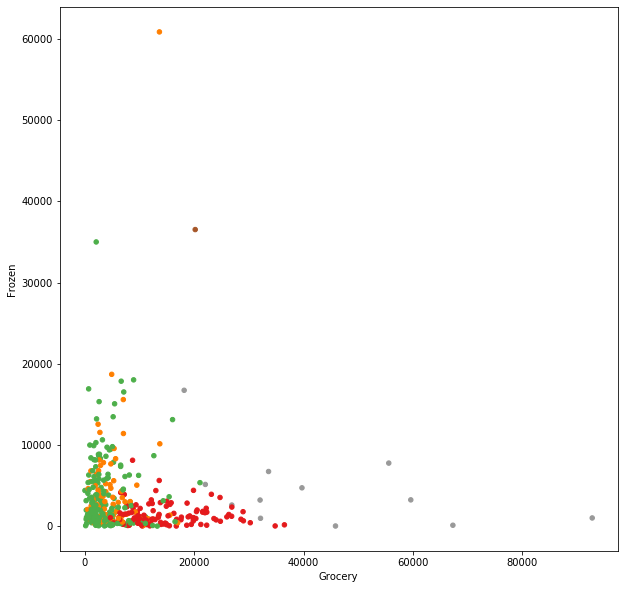

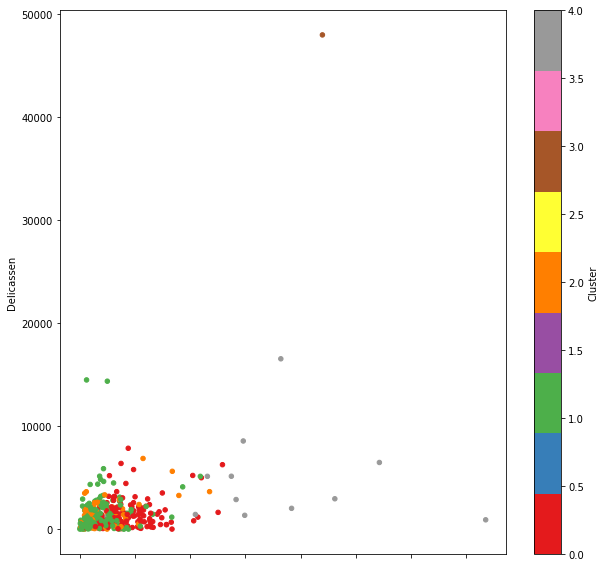

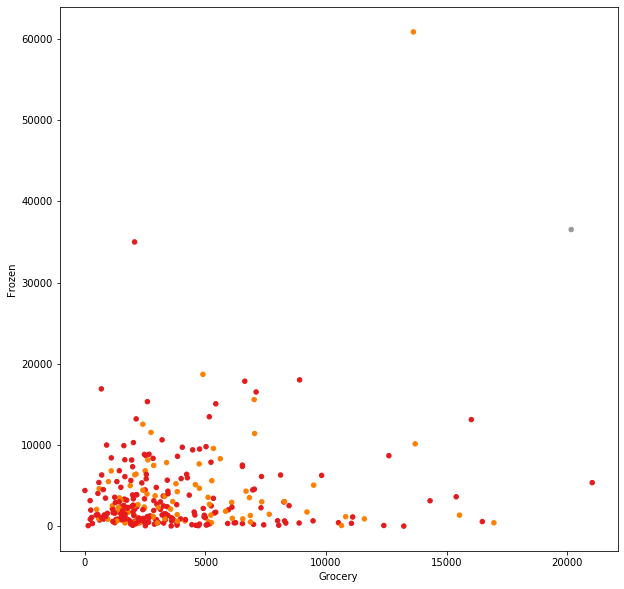

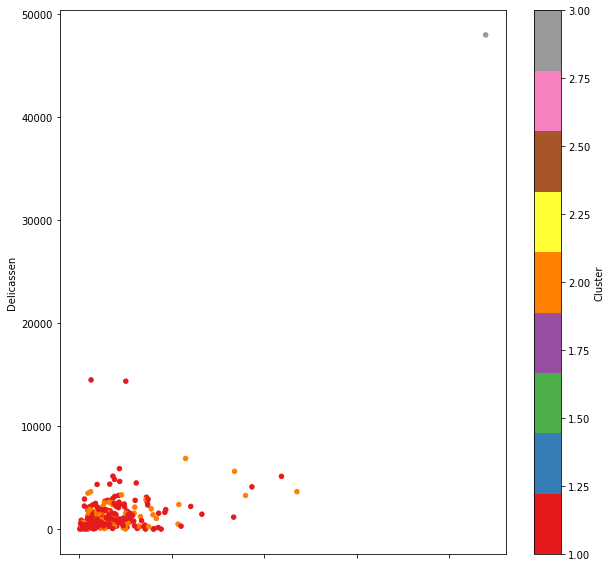

In [76]:
# kmeans_clustering.py

import pandas as pd
import matplotlib.pyplot as plt

# UCI 저장소에서 도매업 고객(wholesale customers) 데이터셋 가져오기
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/' \
           '00292/Wholesale%20customers%20data.csv'
# 경로 주소를 브라우저에 복붙 시 파일 저장 가능
df = pd.read_csv(uci_path, header=0)
#print(df)
# [440 rows x 8 columns]

# 데이터 살펴보기
print(df.head())
print()

# 데이터 자료형 확인
df.info()
print()

# 데이터 통계 요약정보 확인
print(df.describe())
print()

# 데이터 분석에 사용할 속성(열, 변수)을 선택
# k-means는 비지도 학습모델이기 때문에 예측(종속)변수를 지정할 필요가 없고 모두 설명(독립)변수만 사용
# 데이터프레임의 모든 데이터 (8개의 설명변수)
x = df.iloc[:, :]
print(x); print()
print(x[:5]); print()

# 변수 데이터 정규화
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
print(x[:5]); print()

# k-means 모듈 import
# sklearn 라이브러리에서 cluster 군집 모델 가져오기
from sklearn import cluster

# k-means 모델 객체 생성
# k-means 모델은 8개의 속성(변수)을 이용하여 각 관측값을 5개의 클러스터로 구분
# 클러스터의 개수를 5개로 설정, n_clusters=5
kmeans = cluster.KMeans(n_clusters=5)

# k-means 모델 학습
# k-means 모델로 학습 데이터 x를 학습 시키면, 클러스터 갯수(5) 만큼 데이터를 구분
# 모델의 labels_ 속성(변수)에 구분된 클러스터 값(0~4)이 입력
kmeans.fit(x)

# 예측 (군집) 결과를 출력할 열(속성)의 값 구하기
# 변수 labels_ 에 저장된 값을 출력해보면, 0~4 범위의 5개 클러스터 값이 출력됨
# 각 데이터가 어떤 클러스터에 할당 되었는지를 확인 가능
# (매번 실행 할 때마다 예측값의 결과가 다름)
cluster_label = kmeans.labels_
print(cluster_label); print()

# 예측(군집) 결과를 저장할 열(Cluster)을 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())

# 그래프로 시각화 - 클러스터 값 : 0 ~ 4 모두 출력
# 8개의 변수를 하나의 그래프로 표현할 수 없기 때문에 2개의 변수를 선택하여 관측값의 분포 그리기
# 모델의 예측값은 매번 실행할 때마다 달라지므로, 그래프의 형태도 달라짐
# 산점도 : x='Grocery', y='Frozen' 식료품점, 냉동식품
# 산점도 : x='Milk', y='Delicassen' 우유, 조제식품점
df.plot(kind='scatter'
        , x='Grocery', y='Frozen'
        , c='Cluster'
        , cmap='Set1'
        # colorbar 미적용
        , colorbar=False
        , figsize=(10, 10))
df.plot(kind='scatter'
        , x='Milk', y='Delicassen'
        , c='Cluster'
        , cmap='Set1'
        # colorbar 적용
        , colorbar=True
        , figsize=(10, 10))
plt.show()
plt.close()

# 그래프로 시각화 - 클러스터 값 : 1, 2, 3 확대해서 자세하게 출력
# 다른 값들에 비해 지나치게 큰 값으로 구성된 클러스터(0, 4)를 제외
# 데이터들이 몰려 있는 구간을 확대해서 자세하게 분석
# 클러스터 값이 1, 2, 3에 속하는 데이터만 변수 ndf에 저장함
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask]

# 클러스터 값이 1, 2, 3에 속하는 데이터만을 이용해서 분포를 확인
# 산점도 : x='Grocery', y='Frozen' 식료품점, 냉동식품
# 산점도 : x='Milk', y='Delicassen' 우유, 조제식품점
ndf.plot(kind='scatter'
         , x='Grocery', y='Frozen'
         , c='Cluster'
         , cmap='Set1'
         # colorbar 미적용
         , colorbar=False
         , figsize=(10, 10))
ndf.plot(kind='scatter'
         , x='Milk', y='Delicassen'
         , c='Cluster'
         , cmap='Set1'
         # colorbar 적용
         , colorbar=True
         , figsize=(10, 10))
plt.show()
plt.close()